# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Import Statements

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [8]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [9]:
df_data = pd.read_csv('../data/nobel_prize_dataset.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [10]:
df_data.shape

(962, 16)

In [11]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [12]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name  birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16              Paris   
2    Individual        Emil Adolf von Behring  1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy  1822-05-20              Paris   
4    Individual             Jean Henry Dunant  1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA  
2           Marburg              Germany  POL  
3               NaN                  NaN  FRA  
4               NaN                  NaN  CHE

In [13]:
df_data.dtypes

year                      int64
category                 object
prize                    object
motivation               object
prize_share              object
laureate_type            object
full_name                object
birth_date               object
birth_city               object
birth_country            object
birth_country_current    object
sex                      object
organization_name        object
organization_city        object
organization_country     object
ISO                      object
dtype: object

In [14]:
df_data.year.min()

1901

In [15]:
df_data.year.max()

2020

In [16]:
df_data.sample(5)

year   category                                           prize  \
805  2008  Chemistry               The Nobel Prize in Chemistry 2008   
188  1936    Physics                 The Nobel Prize in Physics 1936   
343  1963  Chemistry               The Nobel Prize in Chemistry 1963   
225  1946  Chemistry               The Nobel Prize in Chemistry 1946   
99   1920   Medicine  The Nobel Prize in Physiology or Medicine 1920   

                                            motivation prize_share  \
805  "for the discovery and development of the gree...         1/3   
188                "for his discovery of the positron"         1/2   
343  "for their discoveries in the field of the che...         1/2   
225  "for their preparation of enzymes and virus pr...         1/4   
99   "for his discovery of the capillary motor regu...         1/1   

    laureate_type                      full_name  birth_date    birth_city  \
805    Individual                Osamu Shimomura  1928-08-27         Kyoto   
188    Individual            Carl David Anderson  1905-09-03  New York, NY   
343    Individual                   Karl Ziegler  1898-11-26         Helsa   
225    Individual           John Howard Northrop  1891-07-05   Yonkers, NY   
99     Individual  Schack August Steenberg Krogh  1874-11-15         Grenå   

                birth_country     birth_country_current   sex  \
805                     Japan                     Japan  Male   
188  United States of America  United States of America  Male   
343                   Germany                   Germany  Male   
225  United States of America  United States of America  Male   
99                    Denmark                   Denmark  Male   

                                organization_name organization_city  \
805            Marine Biological Laboratory (MBL)    Woods Hole, MA   
188  California Institute of Technology (Caltech)      Pasadena, CA   
343                           Max-Planck-Institut      Mülheim/Ruhr   
225    Rockefeller Institute for Medical Research     Princeton, NJ   
99                          Copenhagen University        Copenhagen   

         organization_country  ISO  
805  United States of America  JPN  
188  United States of America  USA  
343                   Germany  DEU  
225  United States of America  USA  
99                    Denmark  DNK

* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

In [17]:
df_data.duplicated().sum()

0

### Check for Duplicates

In [18]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [19]:
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()] [col_subset].sample(5)

year category laureate_type birth_date  \
283  1954    Peace  Organization        NaN   
682  1997    Peace  Organization        NaN   
200  1938    Peace  Organization        NaN   
588  1988    Peace  Organization        NaN   
479  1977    Peace  Organization        NaN   

                                             full_name organization_name  
283  Office of the United Nations High Commissioner...               NaN  
682     International Campaign to Ban Landmines (ICBL)               NaN  
200  Office international Nansen pour les Réfugiés ...               NaN  
588                 United Nations Peacekeeping Forces               NaN  
479                              Amnesty International               NaN

In [20]:
df_data.loc[df_data.organization_name.isna()] [col_subset].sample(5)

year    category laureate_type  birth_date  \
54   1909       Peace    Individual  1852-11-22   
130  1926       Peace    Individual  1862-03-28   
763  2004  Literature    Individual  1946-10-20   
779  2005       Peace    Individual  1942-06-17   
683  1997       Peace    Individual  1950-10-09   

                                             full_name organization_name  
54   Paul Henri Benjamin Balluet d'Estournelles de ...               NaN  
130                                    Aristide Briand               NaN  
763                                   Elfriede Jelinek               NaN  
779                                  Mohamed ElBaradei               NaN  
683                                      Jody Williams               NaN

In [21]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)

In [22]:
df_data.sample(5)

year   category                                           prize  \
503  1979    Physics                 The Nobel Prize in Physics 1979   
157  1931  Chemistry               The Nobel Prize in Chemistry 1931   
643  1994   Medicine  The Nobel Prize in Physiology or Medicine 1994   
779  2005      Peace                      The Nobel Peace Prize 2005   
715  2000      Peace                      The Nobel Peace Prize 2000   

                                            motivation prize_share  \
503  "for their contributions to the theory of the ...         1/3   
157  "in recognition of their contributions to the ...         1/2   
643  "for their discovery of G-proteins and the rol...         1/2   
779  "for their efforts to prevent nuclear energy f...         1/2   
715  "for his work for democracy and human rights i...         1/1   

    laureate_type            full_name birth_date  \
503    Individual  Sheldon Lee Glashow 1932-12-05   
157    Individual    Friedrich Bergius 1884-10-11   
643    Individual     Alfred G. Gilman 1941-07-01   
779    Individual    Mohamed ElBaradei 1942-06-17   
715    Individual         Kim Dae-jung 1925-12-03   

                      birth_city             birth_country  \
503                 New York, NY  United States of America   
157  Goldschmieden, near Breslau          Germany (Poland)   
643                New Haven, CT  United States of America   
779                        Cairo                     Egypt   
715                        Mokpo       Korea (South Korea)   

        birth_country_current   sex  \
503  United States of America  Male   
157                    Poland  Male   
643  United States of America  Male   
779                     Egypt  Male   
715       Korea (South Korea)  Male   

                                     organization_name organization_city  \
503                                 Harvard University     Cambridge, MA   
157                           University of Heidelberg        Heidelberg   
643  University of Texas Southwestern Medical Cente...        Dallas, TX   
779                                                NaN               NaN   
715                                                NaN               NaN   

         organization_country  ISO  
503  United States of America  USA  
157                   Germany  POL  
643  United States of America  USA  
779                       NaN  EGY  
715                       NaN  KOR

In [23]:
separated_values = df_data.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denominator = pd.to_numeric(separated_values[1])
df_data['share_pct'] = numerator / denominator

In [24]:
df_data.sample(5)

year    category                               prize  \
32   1906  Literature  The Nobel Prize in Literature 1906   
122  1925  Literature  The Nobel Prize in Literature 1925   
291  1956   Chemistry   The Nobel Prize in Chemistry 1956   
652  1995   Chemistry   The Nobel Prize in Chemistry 1995   
307  1958  Literature  The Nobel Prize in Literature 1958   

                                            motivation prize_share  \
32   "not only in consideration of his deep learnin...         1/1   
122  "for his work which is marked by both idealism...         1/1   
291  "for their researches into the mechanism of ch...         1/2   
652  "for their work in atmospheric chemistry, part...         1/3   
307  "for his important achievement both in contemp...         1/1   

    laureate_type                    full_name birth_date       birth_city  \
32     Individual              Giosuè Carducci 1835-07-27  Val di Castello   
122    Individual          George Bernard Shaw 1856-07-26           Dublin   
291    Individual  Nikolay Nikolaevich Semenov 1896-04-03          Saratov   
652    Individual              Paul J. Crutzen 1933-12-03        Amsterdam   
307    Individual  Boris Leonidovich Pasternak 1890-02-10           Moscow   

       birth_country birth_country_current   sex  \
32   Tuscany (Italy)                 Italy  Male   
122          Ireland               Ireland  Male   
291           Russia                Russia  Male   
652      Netherlands           Netherlands  Male   
307           Russia                Russia  Male   

                                     organization_name organization_city  \
32                                                 NaN               NaN   
122                                                NaN               NaN   
291  Institute for Chemical Physics of the Academy ...            Moscow   
652                                Max-Planck-Institut             Mainz   
307                                                NaN               NaN   

    organization_country  ISO  share_pct  
32                   NaN  ITA       1.00  
122                  NaN  IRL       1.00  
291               Russia  RUS       0.50  
652              Germany  NLD       0.33  
307                  NaN  RUS       1.00

### Check for NaN Values

In [25]:
biology = df_data['sex'].value_counts()
fig = px.pie(df_data, labels=biology.index, values=biology.values, title="Percentage of Male vs Female Winners", names=biology.index, hole=0.4)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

/home/jason/anaconda3/envs/nobel_prize_dataset/lib/python3.11/site-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


In [26]:
female_winners = df_data[df_data['sex'] == 'Female']
first_female_winners = female_winners.sort_values('year', ascending=True)[:3]
first_female_winners

year    category                               prize  \
18  1903     Physics     The Nobel Prize in Physics 1903   
29  1905       Peace          The Nobel Peace Prize 1905   
51  1909  Literature  The Nobel Prize in Literature 1909   

                                           motivation prize_share  \
18  "in recognition of the extraordinary services ...         1/4   
29                                                NaN         1/1   
51  "in appreciation of the lofty idealism, vivid ...         1/1   

   laureate_type                                          full_name  \
18    Individual                        Marie Curie, née Sklodowska   
29    Individual  Baroness Bertha Sophie Felicita von Suttner, n...   
51    Individual                      Selma Ottilia Lovisa Lagerlöf   

   birth_date birth_city                     birth_country  \
18 1867-11-07     Warsaw           Russian Empire (Poland)   
29 1843-06-09     Prague  Austrian Empire (Czech Republic)   
51 1858-11-20   Mårbacka                            Sweden   

   birth_country_current     sex organization_name organization_city  \
18                Poland  Female               NaN               NaN   
29        Czech Republic  Female               NaN               NaN   
51                Sweden  Female               NaN               NaN   

   organization_country  ISO  share_pct  
18                  NaN  POL       0.25  
29                  NaN  CZE       1.00  
51                  NaN  SWE       1.00

In [27]:
first_female_winners.prize

18       The Nobel Prize in Physics 1903
29            The Nobel Peace Prize 1905
51    The Nobel Prize in Literature 1909
Name: prize, dtype: object

In [28]:
first_female_winners.birth_country

18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object

In [29]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

### Type Conversions

* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [30]:
is_winner = df_data.duplicated(subset=['full_name'], keep=False)
multiple_winners = df_data[is_winner]
print(f'There are {multiple_winners.full_name.nunique()}' \
      ' winners who were awarded the prize more than once.')

There are 6 winners who were awarded the prize more than once.


#### Add a Column with the Prize Share as a Percentage

In [31]:
df_data[is_winner].sort_values('full_name')

year   category                              prize  \
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
348  1963      Peace         The Nobel Peace Prize 1963   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
297  1956    Physics    The Nobel Prize in Physics 1956   
424  1972    Physics    The Nobel Prize in Physics 1972   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
340  1962      Peace         The Nobel Peace Prize 1962   
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
283  1954      Peace         The Nobel Peace Prize 1954   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
89                                                 NaN         1/1   
215                                                NaN         1/1   
348                                                NaN         1/2   
306  "for his work on the structure of proteins, es...         1/1   
505  "for their contributions concerning the determ...         1/4   
297  "for their researches on semiconductors and th...         1/3   
424  "for their jointly developed theory of superco...         1/3   
278  "for his research into the nature of the chemi...         1/1   
340                                                NaN         1/1   
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
283                                                NaN         1/1   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
348  Organization  Comité international de la Croix Rouge (Intern...   
306    Individual                                   Frederick Sanger   
505    Individual                                   Frederick Sanger   
297    Individual                                       John Bardeen   
424    Individual                                       John Bardeen   
278    Individual                                 Linus Carl Pauling   
340    Individual                                 Linus Carl Pauling   
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
283  Organization  Office of the United Nations High Commissioner...   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
348        NaT           NaN                       NaN   
306 1918-08-13     Rendcombe            United Kingdom   
505 1918-08-13     Rendcombe            United Kingdom   
297 1908-05-23   Madison, WI  United States of America   
424 1908-05-23   Madison, WI  United States of America   
278 1901-02-28  Portland, OR  United States of America   
340 1901-02-28  Portland, OR  United States of America   
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
283        NaT           NaN                       NaN   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
89                        NaN     NaN   
215                       NaN     NaN   
348                       NaN     NaN   
306            United Kingdom    Male   
505            United Kingdom    Male   
297  United States of America    Male   
424  United States of America    Male   
278  United States of America    Male   
340  U

In [32]:
num_of_categories = df_data.category.nunique()
num_of_categories

6

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

In [33]:
number_of_prizes_by_category = df_data.category.value_counts()
number_of_prizes_by_category

Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: category, dtype: int64

In [34]:
v_bar = px.bar(number_of_prizes_by_category, x=number_of_prizes_by_category.index, y=number_of_prizes_by_category.values, color=number_of_prizes_by_category.values, color_continuous_scale='Aggrnyl', orientation='v', title='Number of Prizes Awarded by Category')
v_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Category', coloraxis_showscale=False)
v_bar.show()

# Who were the first 3 Women to Win the Nobel Prize?
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [35]:
first_economics = df_data[df_data.category == 'Economics'].sort_values('year', ascending=True)[:1]
first_economics

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  share_pct  
393         Rotterdam          Netherlands  NLD       0.50

In [36]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

# Find the Repeat Winners


In [74]:
cat_men_women = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize':pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women

category     sex  prize
11     Physics    Male    212
7     Medicine    Male    210
1    Chemistry    Male    179
5   Literature    Male    101
9        Peace    Male     90
3    Economics    Male     84
8        Peace  Female     17
4   Literature  Female     16
6     Medicine  Female     12
0    Chemistry  Female      7
10     Physics  Female      4
2    Economics  Female      2

In [38]:
v_bar_split = px.bar(x=cat_men_women.category, y=cat_men_women.prize, color=cat_men_women.sex, title="Number of Prizes Awarded per Category split by Men and Women")
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', yaxis_title='Number of Prizes', coloraxis_showscale=False)
v_bar_split.show()

# Number of Prizes per Category
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [39]:
prizes_per_year = df_data.groupby('year').agg({'prize':pd.Series.count})
prizes_per_year

prize
year       
1901      6
1902      7
1903      7
1904      6
1905      5
...     ...
2016     11
2017     12
2018     13
2019     14
2020     12

[117 rows x 1 columns]

In [40]:
rolling_avg = prizes_per_year.rolling(5).mean()
rolling_avg

prize
year       
1901    NaN
1902    NaN
1903    NaN
1904    NaN
1905   6.20
...     ...
2016  11.60
2017  12.00
2018  12.00
2019  12.20
2020  12.40

[117 rows x 1 columns]

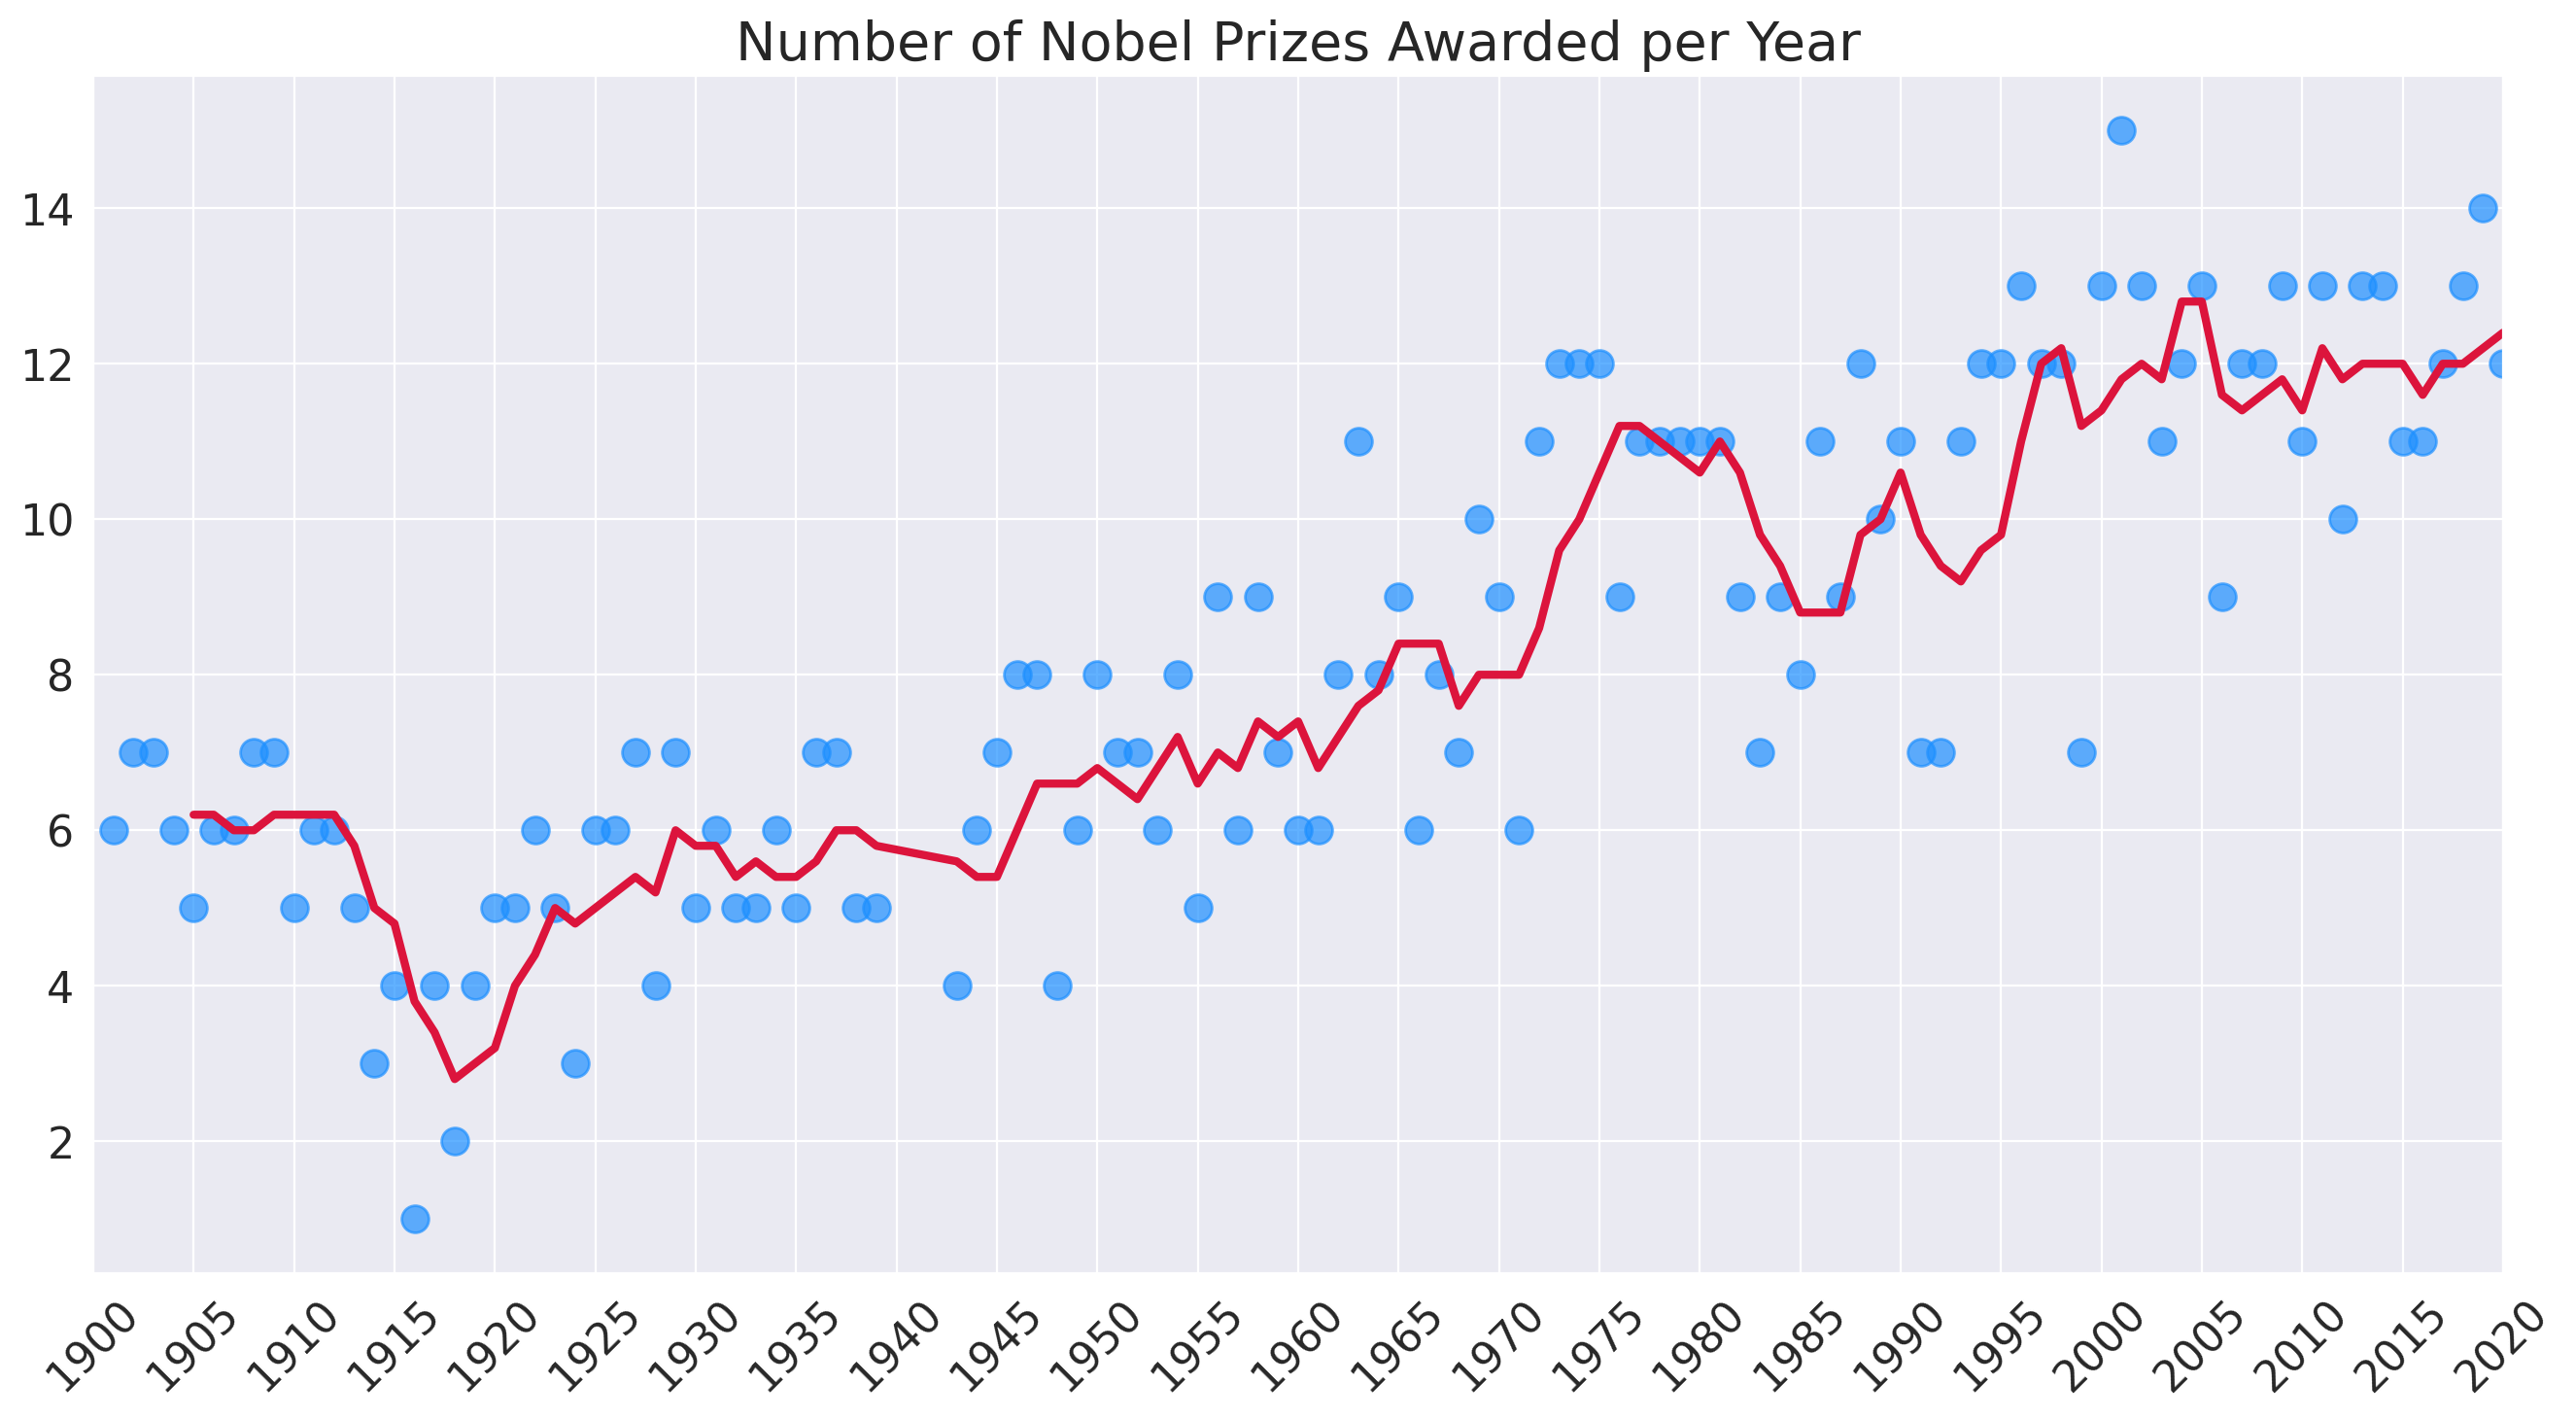

In [41]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=16, rotation=45)
ax = plt.gca()
ax.set_xlim(1900, 2020)
ax.scatter(prizes_per_year.index, prizes_per_year.values, c='dodgerblue', alpha=0.7, s=100)
ax.plot(rolling_avg.index, rolling_avg.values, c='crimson', lw=3)
plt.show()

* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [42]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

In [43]:
yearly_avg_share = df_data.groupby('year').agg({'share_pct':pd.Series.mean})
share_moving_avg = yearly_avg_share.rolling(5).mean()
yearly_avg_share

share_pct
year           
1901       0.83
1902       0.71
1903       0.71
1904       0.83
1905       1.00
...         ...
2016       0.55
2017       0.50
2018       0.46
2019       0.43
2020       0.50

[117 rows x 1 columns]

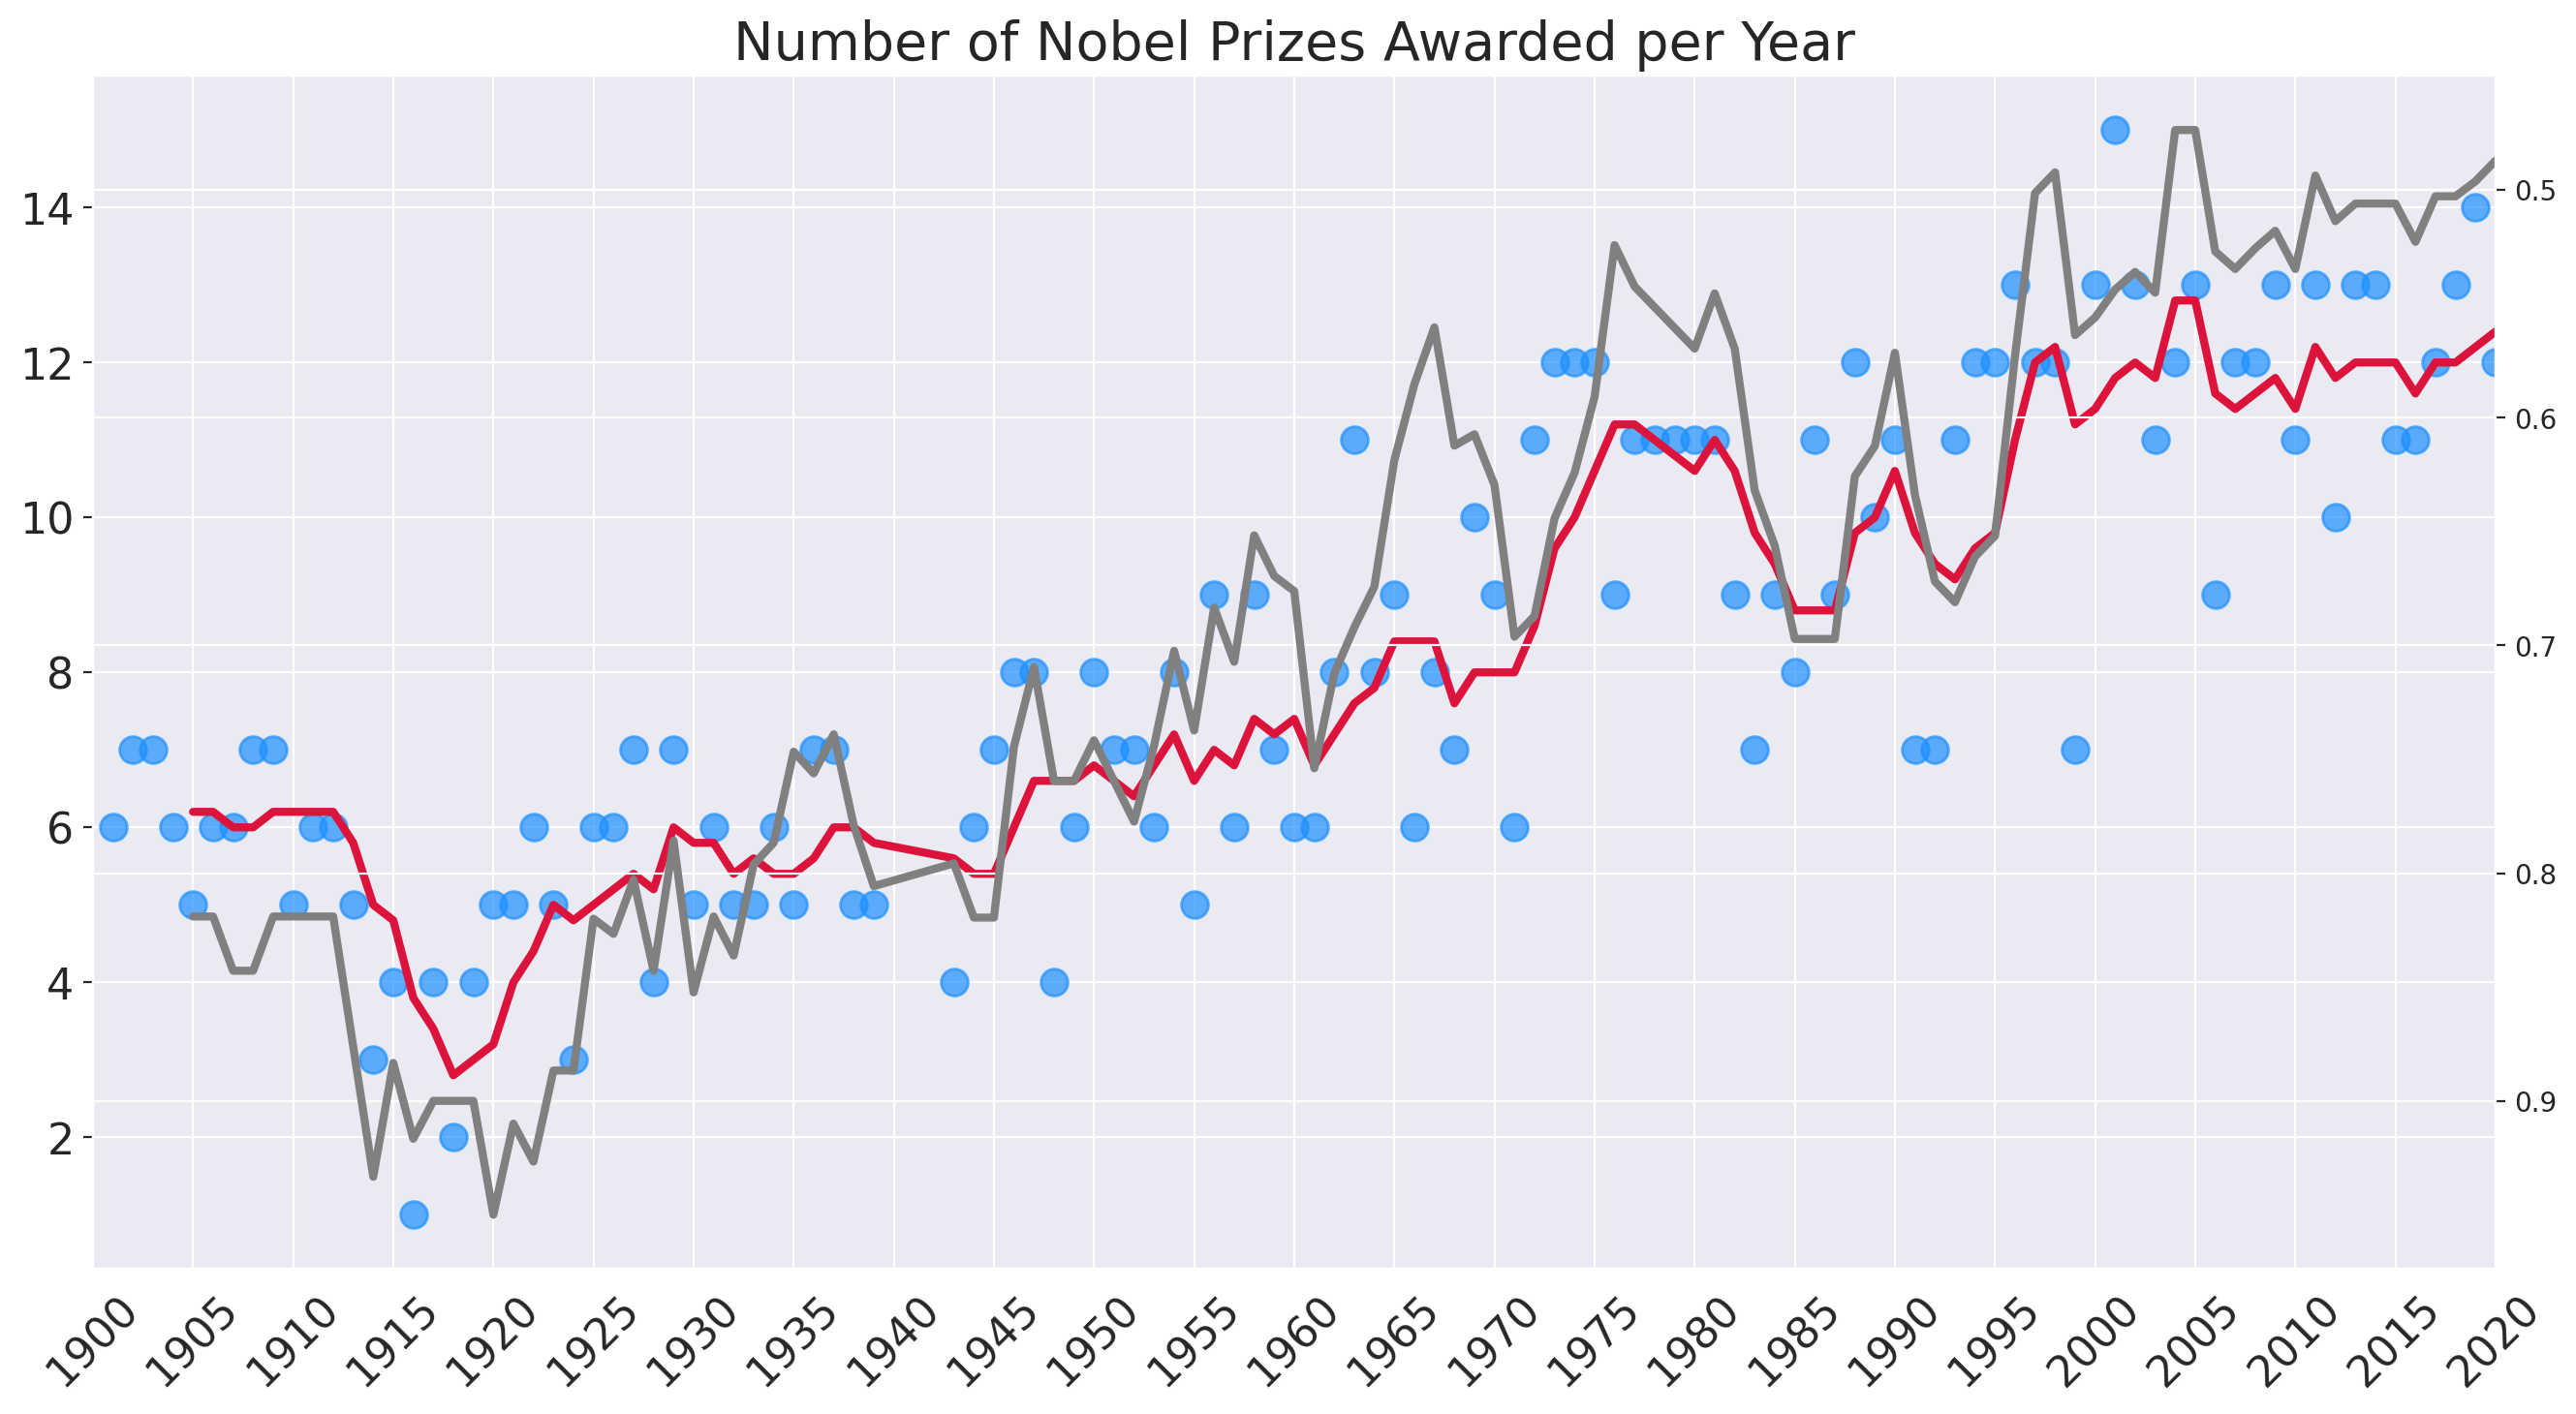

In [44]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(ticks=np.arange(1900, 2021, step=5), fontsize=16, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.invert_yaxis()
ax1.set_xlim(1900, 2020)
ax1.scatter(prizes_per_year.index, prizes_per_year.values, c='dodgerblue', alpha=0.7, s=100)
ax1.plot(rolling_avg.index, rolling_avg.values, c='crimson', lw=3)
ax2.plot(prizes_per_year.index, share_moving_avg.values, c='grey', lw=3)
plt.show()

# Male and Female Winners by Category

Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 


In [75]:
df_data.head()

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00  
2           Marburg              Germany  POL       1.00        47.00  
3               NaN                  NaN  FRA       0.50        79.00  
4               NaN                  NaN  CHE       0.50        73.00

In [46]:
top_20_countries = df_data.groupby('birth_country_current').agg({'prize':pd.Series.count}).sort_values('prize', ascending=False)[:20]
top_20_countries

prize
birth_country_current          
United States of America    281
United Kingdom              105
Germany                      84
France                       57
Sweden                       29
Japan                        27
Poland                       27
Russia                       26
Canada                       20
Switzerland                  19
Italy                        19
Austria                      18
Netherlands                  18
Denmark                      12
China                        12
Norway                       12
Australia                    10
Belgium                       9
India                         9
South Africa                  9

In [47]:
h_bar=px.bar(top_20_countries, y=top_20_countries.index, x=top_20_countries.prize, color=top_20_countries.prize, orientation='h', title='Top 20 Countries with the Most Nobel Prize Winners', color_continuous_scale='Aggrnyl')
h_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country', coloraxis_showscale=False)
h_bar.show()

# Number of Prizes Awarded Over Time
Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes.


In [48]:
df_countries = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count}).sort_values('prize', ascending=False)

In [49]:
df_countries

birth_country_current  ISO  prize
74  United States of America  USA    281
73            United Kingdom  GBR    105
26                   Germany  DEU     84
25                    France  FRA     57
67                    Sweden  SWE     29
..                       ...  ...    ...
32                   Iceland  ISL      1
47                Madagascar  MDG      1
34                 Indonesia  IDN      1
36                      Iraq  IRQ      1
78                  Zimbabwe  ZWE      1

[79 rows x 3 columns]

In [50]:
world_map = px.choropleth(df_countries, locations='ISO', color='prize', hover_name="birth_country_current", color_continuous_scale=px.colors.sequential.matter, title='Number of Nobel Prize Winners by Country')
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

In [51]:
country_prizes = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize':pd.Series.count})
country_prizes

birth_country_current    category  prize
0                     Algeria  Literature      1
1                     Algeria     Physics      1
2                   Argentina    Medicine      2
3                   Argentina       Peace      2
4                   Australia   Chemistry      1
..                        ...         ...    ...
206  United States of America     Physics     70
207                 Venezuela    Medicine      1
208                   Vietnam       Peace      1
209                     Yemen       Peace      1
210                  Zimbabwe       Peace      1

[211 rows x 3 columns]

# Are More Prizes Shared Than Before?

Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 

In [52]:
merged_df = pd.merge(country_prizes, top_20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values('total_prize', inplace=True)
merged_df

birth_country_current    category  cat_prize  total_prize
85               South Africa       Peace          3            9
47                      India     Physics          1            9
46                      India       Peace          1            9
45                      India    Medicine          2            9
44                      India  Literature          2            9
..                        ...         ...        ...          ...
105  United States of America  Literature         10          281
107  United States of America       Peace         19          281
103  United States of America   Chemistry         55          281
104  United States of America   Economics         49          281
108  United States of America     Physics         70          281

[109 rows x 4 columns]

In [53]:
cat_bar = px.bar(merged_df, x=merged_df.cat_prize, y=merged_df.birth_country_current, color=merged_df.category, title='Number of Nobel Prize Winners by Country and Category', orientation='h')
cat_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Category', legend_title='Category')
cat_bar.show()

In [54]:
prize_by_year = df_data.groupby(by=['birth_country_current', 'year'], as_index = False).count()

In [55]:
prize_by_year = prize_by_year.sort_values(by='year')[['year', 'birth_country_current', 'prize']]

In [56]:
prize_by_year

year     birth_country_current  prize
118  1901                    France      2
346  1901                    Poland      1
159  1901                   Germany      1
312  1901               Netherlands      1
440  1901               Switzerland      1
..    ...                       ...    ...
31   2019                   Austria      1
221  2020                   Germany      1
622  2020  United States of America      7
533  2020            United Kingdom      2
158  2020                    France      1

[627 rows x 3 columns]

# The Countries with the Most Nobel Prizes

In [76]:
cumulative_prizes = prize_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)

In [58]:
l_chart = px.line(cumulative_prizes, x='year', y='prize', color='birth_country_current', title='Cumulative Number of Nobel Prizes by Country', hover_name='birth_country_current')
l_chart.update_layout(xaxis_title='Year', yaxis_title='Number of Prizes')
l_chart.show()

In [59]:
df_data.sample(5)

year  category                                           prize  \
213  1944  Medicine  The Nobel Prize in Physiology or Medicine 1944   
17   1903   Physics                 The Nobel Prize in Physics 1903   
619  1991   Physics                 The Nobel Prize in Physics 1991   
487  1978  Medicine  The Nobel Prize in Physiology or Medicine 1978   
67   1911   Physics                 The Nobel Prize in Physics 1911   

                                            motivation prize_share  \
213  "for their discoveries relating to the highly ...         1/2   
17   "in recognition of the extraordinary services ...         1/2   
619  "for discovering that methods developed for st...         1/1   
487  "for the discovery of restriction enzymes and ...         1/3   
67   "for his discoveries regarding the laws govern...         1/1   

    laureate_type                full_name birth_date           birth_city  \
213    Individual   Herbert Spencer Gasser 1888-07-05      Platteville, WI   
17     Individual  Antoine Henri Becquerel 1852-12-15                Paris   
619    Individual  Pierre-Gilles de Gennes 1932-10-24                Paris   
487    Individual        Hamilton O. Smith 1931-08-23         New York, NY   
67     Individual             Wilhelm Wien 1864-01-13  Gaffken (Parusnoye)   

                birth_country     birth_country_current   sex  \
213  United States of America  United States of America  Male   
17                     France                    France  Male   
619                    France                    France  Male   
487  United States of America  United States of America  Male   
67           Prussia (Russia)                    Russia  Male   

                              organization_name organization_city  \
213  Rockefeller Institute for Medical Research      New York, NY   
17                          École Polytechnique             Paris   
619                           Collège de France             Paris   
487                    Johns Hopkins University     Baltimore, MD   
67                          Würzburg University          Würzburg   

         organization_country  ISO  share_pct  
213  United States of America  USA       0.50  
17                     France  FRA       0.50  
619                    France  FRA       1.00  
487  United States of America  USA       0.33  
67                    Germany  RUS       1.00

In [60]:
top_20_orgs = df_data.organization_name.value_counts()[:20]
top_20_orgs.sort_values(ascending=True, inplace=True)

In [61]:
org_bar = px.bar(top_20_orgs, x=top_20_orgs.values, y=top_20_orgs.index, orientation='h', title='Top 20 Organizations with the Most Nobel Prizes', color=top_20_orgs.values, color_continuous_scale=px.colors.sequential.haline)
org_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Organization', legend_title='Number of Prizes', coloraxis_showscale=False)
org_bar.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

In [62]:
top_20_org_cities = df_data.organization_city.value_counts()[:20]
top_20_org_cities.sort_values(ascending=True, inplace=True)

In [63]:
city_bar2 = px.bar(top_20_org_cities, x=top_20_org_cities.values, y=top_20_org_cities.index, orientation='h', title='Top 20 Cities with the Most Nobel Prizes', color=top_20_org_cities.values, color_continuous_scale=px.colors.sequential.Plasma)
city_bar2.update_layout(xaxis_title='Number of Prizes', yaxis_title='City', legend_title='Number of Prizes', coloraxis_showscale=False)
city_bar2.show()

In [64]:
top_20_cities = df_data.birth_city.value_counts()[:20]
top_20_cities.sort_values(ascending=True, inplace=True)

In [65]:
city_bar = px.bar(top_20_cities, x=top_20_cities.values, y=top_20_cities.index, orientation='h', title='Where are the Laureates Born', color=top_20_cities.values, color_continuous_scale=px.colors.sequential.Plasma)
city_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='City', legend_title='Number of Prizes', coloraxis_showscale=False)
city_bar.show()

In [66]:
country_city_org = df_data.groupby(['organization_country', 'organization_city', 'organization_name'], as_index=False).agg({'prize': pd.Series.count})
country_city_org.sort_values(by='prize', ascending=False)

organization_country     organization_city  \
205  United States of America         Cambridge, MA   
280  United States of America          Stanford, CA   
206  United States of America         Cambridge, MA   
209  United States of America           Chicago, IL   
195  United States of America          Berkeley, CA   
..                        ...                   ...   
110                     Japan               Sapporo   
111                     Japan                 Tokyo   
112                     Japan                 Tokyo   
113                     Japan                 Tokyo   
290  United States of America  Yorktown Heights, NY   

                               organization_name  prize  
205                           Harvard University     29  
280                          Stanford University     23  
206  Massachusetts Institute of Technology (MIT)     21  
209                        University of Chicago     20  
195                     University of California     19  
..                                           ...    ...  
110                          Hokkaido University      1  
111                      Asahi Kasei Corporation      1  
112                          Kitasato University      1  
113                Tokyo Institute of Technology      1  
290         IBM Thomas J. Watson Research Center      1  

[291 rows x 4 columns]

In [67]:
burst = px.sunburst(country_city_org, path=['organization_country', 'organization_city', 'organization_name'], values='prize', title='Where do Discoveries Take Place?')
burst.update_layout(xaxis_title='Number of Prizes', yaxis_title='City', legend_title='Number of Prizes', coloraxis_showscale=False)
burst.show()

# In Which Categories are the Different Countries Winning Prizes? 
* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


In [68]:
birth_years = df_data.birth_date.dt.year
df_data['winning_age'] = df_data.year - birth_years

In [69]:
display(df_data.nlargest(n=1, columns='winning_age'))

year   category                              prize  \
937  2019  Chemistry  The Nobel Prize in Chemistry 2019   

                                         motivation prize_share laureate_type  \
937  “for the development of lithium-ion batteries”         1/3    Individual   

           full_name birth_date birth_city birth_country  \
937  John Goodenough 1922-07-25       Jena       Germany   

    birth_country_current   sex    organization_name organization_city  \
937               Germany  Male  University of Texas         Austin TX   

         organization_country  ISO  share_pct  winning_age  
937  United States of America  DEU       0.33        97.00

In [70]:
display(df_data.nsmallest(n=1, columns='winning_age'))

year category                       prize  \
885  2014    Peace  The Nobel Peace Prize 2014   

                                            motivation prize_share  \
885  "for their struggle against the suppression of...         1/2   

    laureate_type         full_name birth_date birth_city birth_country  \
885    Individual  Malala Yousafzai 1997-07-12    Mingora      Pakistan   

    birth_country_current     sex organization_name organization_city  \
885              Pakistan  Female               NaN               NaN   

    organization_country  ISO  share_pct  winning_age  
885                  NaN  PAK       0.50        17.00

In [71]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

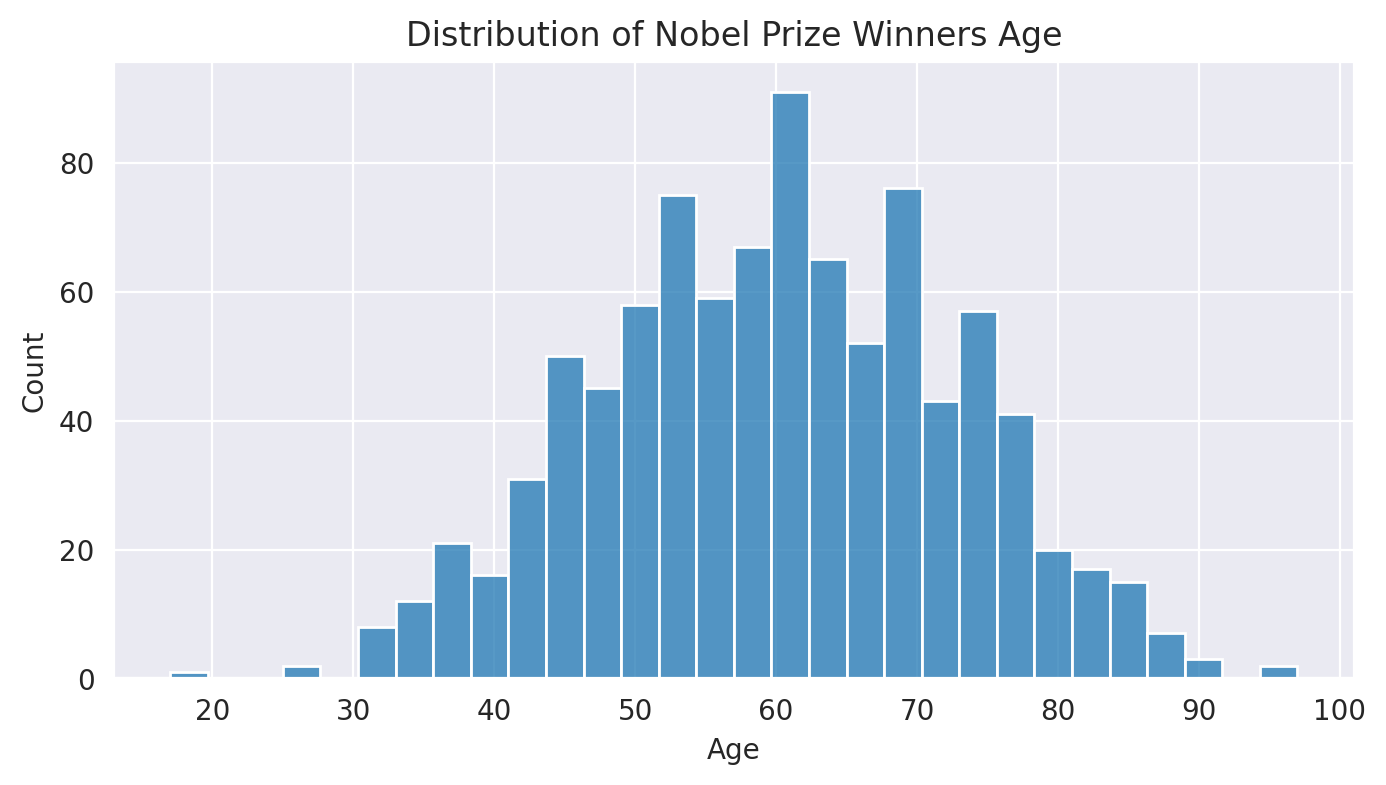

In [72]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data, x=df_data.winning_age, bins=30)
plt.xlabel('Age')
plt.title('Distribution of Nobel Prize Winners Age')
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

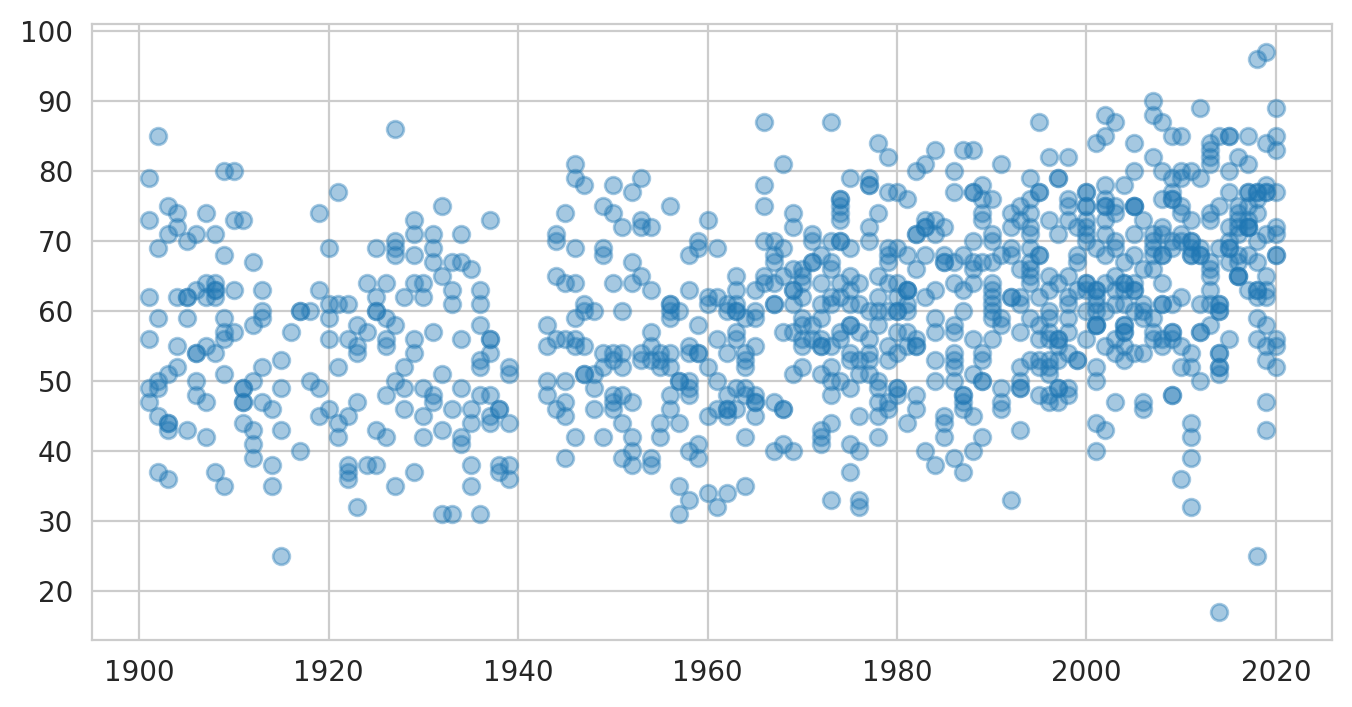

In [73]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.regplot(data=df_data, x='year', y='winning_age', scatter_kws={'alpha': 0.4}, lowess=True, line_kws={'color': 'black'})
plt.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
    sns.boxplot(data=df_data, x='category', y='winning_age')
plt.show()

In [ ]:

with sns.axes_style("whitegrid"):
    sns.lmplot(data=df_data,
               x='year',
               y='winning_age',
               hue='category',
               lowess=True,
               aspect=2,
               scatter_kws={'alpha': 0.5},
               line_kws={'linewidth': 5})

plt.show()